In [1]:
from account_book import AccountBook

FILEPATH = "MoneyTracking.xlsx"
account_book = AccountBook(FILEPATH)

In [2]:
def get_sheets(currency_name):
    income = account_book.income.loc[account_book.income["currency"]==currency_name]
    outcome = account_book.spending.loc[account_book.spending["currency"]==currency_name]
    transfer_from = account_book.transfer_from.loc[account_book.transfer_from["currency"]==currency_name]
    transfer_to = account_book.transfer_to.loc[account_book.transfer_to["currency"]==currency_name]
    return {"income": income, "outcome": outcome, "transfer_from": transfer_from, "transfer_to": transfer_to}

# Get USD only
us = get_sheets("USD")

In [3]:
def get_balance(currency, account):
    sheets = get_sheets(currency)
    money_in = (
        currency["income"].loc[currency["income"]["account"] == account]["amount"].sum() +
        currency["transfer_to"].loc[currency["transfer_to"]["account"] == account]["amount"].sum()
    )
    money_out = (
        currency["outcome"].loc[currency["outcome"]["account"] == account]["amount"].sum() +
        currency["transfer_from"].loc[currency["transfer_from"]["account"] == account]["amount"].sum()
    )
    return float(money_in - money_out)

print("===============================================================")
print("MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT")
print("===============================================================")
print("Saving: {:.2f}".format(get_balance(us, "Saving")))
print("Checking: {:.2f}".format(get_balance(us, "Checking")))
print("Cash: {:.2f}".format(get_balance(us, "Cash")))
print("Credit Card: {:.2f}".format(get_balance(us, "Credit Card")))

MAKE SURE THE AMOUNTS ARE IDENTICAL TO YOUR BANK ACCOUNT
Saving: 27039.91
Checking: 32578.85
Cash: 55.00
Credit Card: -343.75


In [4]:
# pet = us["outcome"]
# pet.loc[pet.category == "Pet"] 

In [5]:
# evelyn_credit_card = us["outcome"].loc[us["outcome"]["account"] == "Credit Card - Evelyn"]
# print("Credit Card (Evelyn): {:.2f}".format(-evelyn_credit_card["amount"].sum()))

In [6]:
def get_spending_df(currency, start_date, end_date):
    return currency["outcome"].loc[(currency["outcome"]["date"] >= start_date) & (currency["outcome"]["date"] <= end_date)]

def get_spending(currency, start_date, end_date):
    return get_spending_df(currency, start_date, end_date).groupby("category").sum()["amount"].sort_values(ascending=False)

def draw_spending_pie_chart(spending):
    spending.plot.pie(y="amount", startangle=90, autopct='%1.1f%%')
    
def get_spending_category_insight(currency, category, start_date, end_date):
    df = get_spending_df(us, start_date, end_date)
    df = df.loc[df.category == category]
    return df.groupby(df.detail.str.lower()).sum()["amount"].sort_values(ascending=False)

2020 Groceries overview
detail
h mart                    377.25
sprouts                   338.37
target                    316.46
trader joe's              277.35
costco                    249.11
99 ranch                  195.47
wholefood                  41.87
mitsuwa                    26.94
trarget                    23.60
168 market                 23.11
sheng kee barkey           22.19
pb hostetter paris bag     18.39
paris bague                16.38
the market at north pa      6.24
tous les jours              5.50
Name: amount, dtype: float64


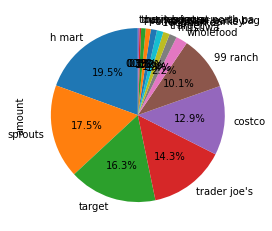

In [7]:
print("2020 Groceries overview")
start_date, end_date= "20200601", "20201231"
groceries = get_spending_category_insight(us, "Groceries", start_date, end_date)
print(groceries)
draw_spending_pie_chart(groceries)

In [11]:
start_date, end_date= "20200901", "20200930"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.09 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

print("******************")
print("Sub - Cash,Check & Misc")
print("******************")
print(get_spending_category_insight(us, "Cash,Check & Misc", start_date, end_date))

2020.09 Spending: 6588.23
category
Cash,Check & Misc       3500.00
Home & Utilities        3066.00
Groceries                 16.38
Restaurants & Dining       5.85
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
paris bague    16.38
Name: amount, dtype: float64
******************
Sub - Cash,Check & Misc
******************
detail
to eve's boa checking    3500.0
Name: amount, dtype: float64


In [10]:
start_date, end_date= "20200801", "20200831"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.08 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Sub - Groceries")
print("******************")
print(get_spending_category_insight(us, "Groceries", start_date, end_date))

2020.08 Spending: 5296.25
category
Home & Utilities            3196.61
Pet                          596.15
Groceries                    595.74
Shopping & Entertainment     340.62
Restaurants & Dining         300.60
Cash,Check & Misc            208.88
Transportation                57.65
Name: amount, dtype: float64
******************
Sub - Groceries
******************
detail
h mart              146.74
costco              139.51
trader joe's        134.18
target               63.75
sprouts              63.44
99 ranch             36.93
sheng kee barkey     11.19
Name: amount, dtype: float64


In [9]:
food = get_spending_df(us, start_date, end_date)
food = food.loc[food.category == "Restaurants & Dining"]
food

,date,currency,bank,account,amount,category,detail,note,credit_card,Unnamed: 9
100,2020-08-01,USD,Bank of America,Credit Card,35.59,Restaurants & Dining,Boiling Point,NaN,Bank of America Cash Rewards World Master Card...,NaN
107,2020-08-04,USD,Bank of America,Credit Card,37.44,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,NaN
110,2020-08-07,USD,Bank of America,Credit Card,43.87,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,"me, Evelyn and Mendy"
111,2020-08-07,USD,Bank of America,Credit Card,31.43,Restaurants & Dining,Taiwan Shih,NaN,Bank of America Cash Rewards World Master Card...,NaN
113,2020-08-08,USD,Bank of America,Credit Card,22.30,Restaurants & Dining,Tea Spoon,NaN,Bank of America Cash Rewards World Master Card...,NaN
116,2020-08-09,USD,Bank of America,Credit Card,45.10,Restaurants & Dining,Boiling Point,NaN,Bank of America Cash Rewards World Master Card...,Doordash
134,2020-08-18,USD,Bank of America,Credit Card,2.00,Restaurants & Dining,Vending machine,NaN,NaN,NaN
139,2020-08-20,USD,Bank of America,Checking,2.40,Restaurants & Dining,Starbucks,NaN,NaN,Venmo to Jaspher
146,2020-08-22,USD,Bank of America,Credit Card,74.62,Restaurants & Dining,Easterly,NaN,Bank of America Cash Rewards World Master Card...,with Mendy and Ben


2020.07 Spending: 13928.87
category
Cash,Check & Misc           10043.87
Home & Utilities             2328.43
Groceries                     723.56
Pet                           510.32
Restaurants & Dining          213.92
Transportation                 93.78
Shopping & Entertainment       14.99
Name: amount, dtype: float64
******************
Remove tuition
******************
category
Home & Utilities            2328.43
Groceries                    723.56
Pet                          510.32
Restaurants & Dining         213.92
Transportation                93.78
Cash,Check & Misc             43.87
Shopping & Entertainment      14.99
Name: amount, dtype: float64


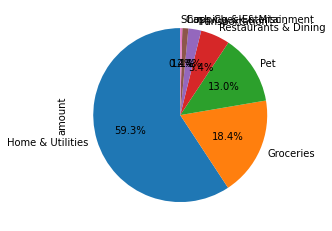

In [10]:
start_date, end_date= "20200701", "20200731"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.07 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

print("******************")
print("Remove tuition")
print("******************")
spneding_2020_07 = get_spending_df(us, start_date, end_date)
spending_2020_07_remove_tuition = spneding_2020_07[spneding_2020_07.detail != "SJSU Tuition"].groupby("category").sum()["amount"].sort_values(ascending=False)
print(spending_2020_07_remove_tuition)

draw_spending_pie_chart(spending_2020_07_remove_tuition)

In [11]:
start_date, end_date= "20200601", "20200630"
spending = get_spending(us, start_date, end_date)
print("===============================================================")
print("2020.06 Spending: {:.2f}".format(spending.sum()))
print("===============================================================")
print(spending)

2020.06 Spending: 2965.86
category
Home & Utilities            1974.48
Groceries                    602.55
Restaurants & Dining         352.09
Transportation                21.75
Shopping & Entertainment      14.99
Name: amount, dtype: float64
